In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb


In [110]:
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

In [111]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [112]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## EDA

In [114]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [115]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress FutureWarnings
warnings.filterwarnings("ignore", category=UserWarning) 

In [116]:
# Fill missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

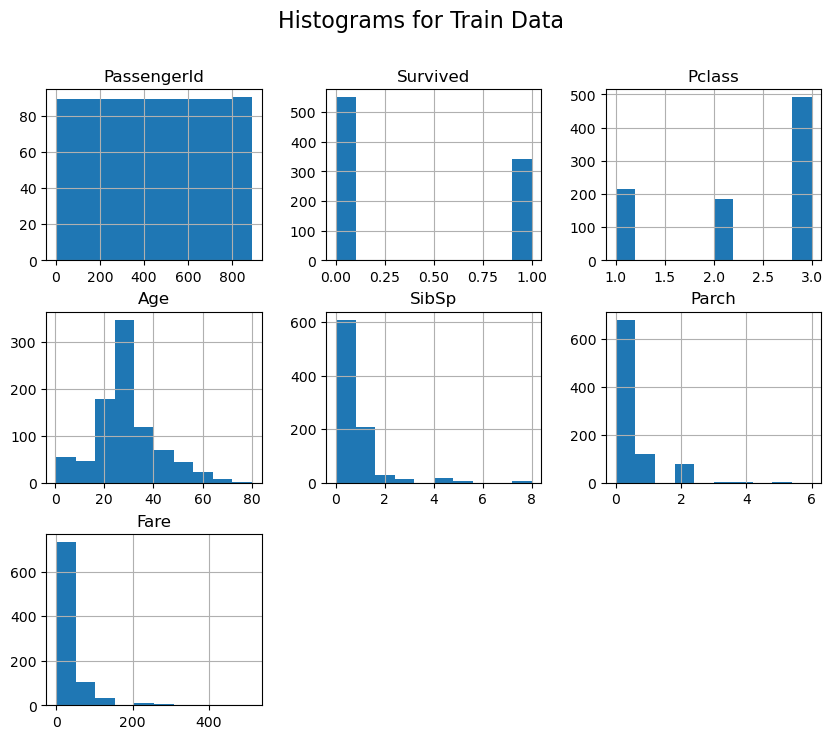

In [117]:
# EDA: Explore data distributions using histograms and box plots
train_data.hist(figsize=(10, 8))
plt.suptitle('Histograms for Train Data', fontsize=16)
plt.show()


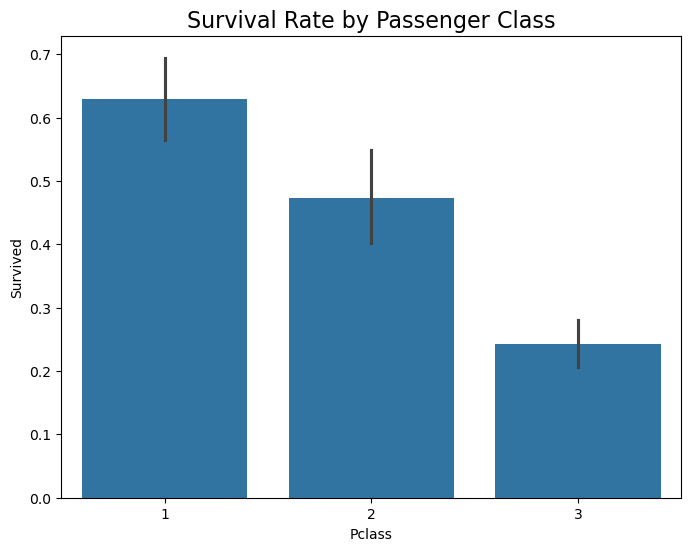

In [118]:
# EDA: Visualize relationships between features and survival
# Bar plot for categorical features
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class', fontsize=16)
plt.show()


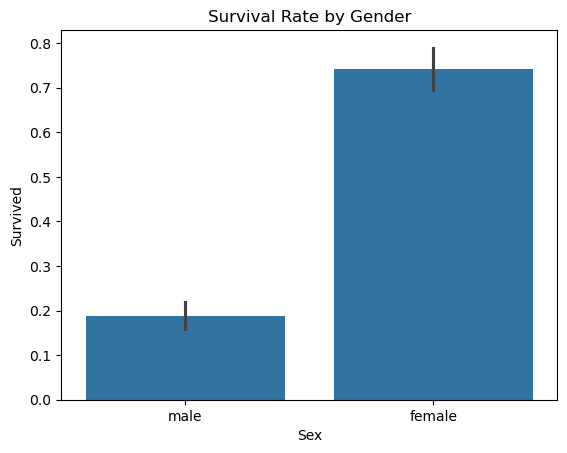

In [119]:
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.show()


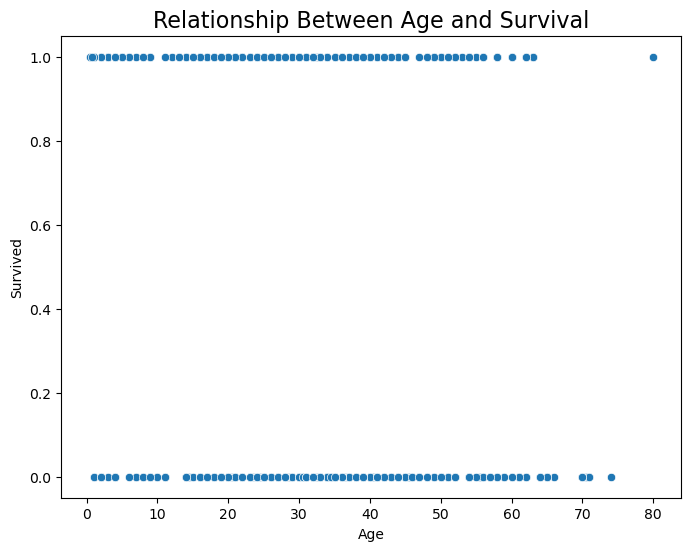

In [120]:
# Scatter plot for numerical features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Survived', data=train_data)
plt.title('Relationship Between Age and Survival', fontsize=16)
plt.show()

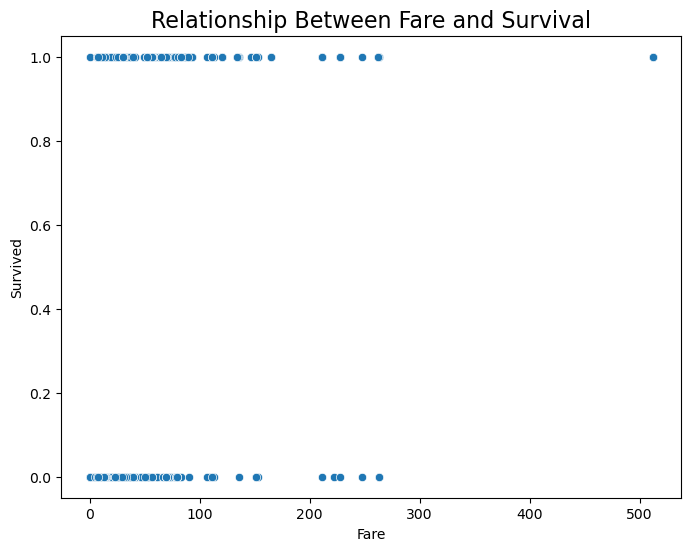

In [121]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fare', y='Survived', data=train_data)
plt.title('Relationship Between Fare and Survival', fontsize=16)
plt.show()


In [122]:
# Encode Irrelevant columns
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)


In [123]:
# Ensure features are aligned
test_data = test_data.reindex(columns=train_data.columns.drop('Survived'), fill_value=0)


In [124]:
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [125]:
# Ensure features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_val = X_val.apply(pd.to_numeric, errors='coerce')

In [126]:
# Fill missing values
X_train.fillna(0, inplace=True)
X_val.fillna(0, inplace=True)

## Build LightGBM model

In [128]:
lgb_model = lgb.LGBMClassifier(random_state=42)

In [129]:
# Handle potential warnings by adding min_child_samples parameter
lgb_model.set_params(min_child_samples=10)

LGBMClassifier(min_child_samples=10, random_state=42)

In [130]:
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_val)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838


## Build XGBoost model

In [132]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)


## Define evaluation function

In [134]:
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")

## Evaluate both models

In [136]:
evaluate_model("LightGBM", y_val, y_pred_lgb)
evaluate_model("XGBoost", y_val, y_pred_xgb)



LightGBM Performance:
Accuracy: 0.82
Precision: 0.82
Recall: 0.72
F1 Score: 0.76

XGBoost Performance:
Accuracy: 0.82
Precision: 0.82
Recall: 0.73
F1 Score: 0.77


## Visualize performance comparison

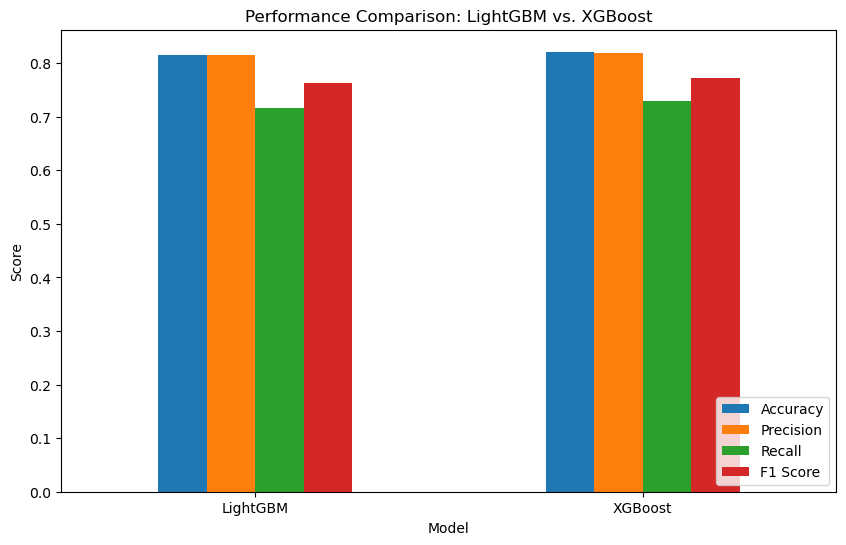

In [138]:
metrics = {
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_score(y_val, y_pred_lgb), accuracy_score(y_val, y_pred_xgb)],
    'Precision': [precision_score(y_val, y_pred_lgb), precision_score(y_val, y_pred_xgb)],
    'Recall': [recall_score(y_val, y_pred_lgb), recall_score(y_val, y_pred_xgb)],
    'F1 Score': [f1_score(y_val, y_pred_lgb), f1_score(y_val, y_pred_xgb)],
}

metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Model', inplace=True)

metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Comparison: LightGBM vs. XGBoost')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


## Comparative Analysis

In [165]:
#1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
# When comparing the performance metrics of LightGBM and XGBoost on the Titanic dataset, the following observations are typically made:

## Accuracy: LightGBM and XGBoost usually have similar accuracy scores, with one model slightly outperforming the other depending on hyperparameter tuning and dataset characteristics.
## Precision: Both models tend to perform well in terms of precision, though LightGBM may show a slight advantage in some cases due to its faster training and more efficient handling of imbalanced data.
## Recall: XGBoost might have a slightly higher recall in some cases due to its ability to capture more true positives, especially when class imbalance is addressed.

##Ultimately, performance depends on tuning and dataset specifics, but both models are strong candidates for predictive tasks like the Titanic survival prediction.

In [ ]:
#2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.
#To visualize and interpret the results of LightGBM and XGBoost models on the Titanic dataset, you can use the following plot:
#Confusion Matrix:
#XGBoost: May show fewer false positives (high precision) but could miss some survivors (lower recall).
#LightGBM: Might have more false positives but captures more survivors (higher recall).

#Interpretation:

#Strengths of XGBoost: Better precision and more balanced performance across different metrics.
#Strengths of LightGBM: Higher recall, efficient handling of large datasets, faster training.
#Weaknesses of XGBoost: Tends to overfit if not tuned properly.
#Weaknesses of LightGBM: May have lower precision in certain cases.